In [3]:
!pip install requests beautifulsoup4 pandas


  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 551.2 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/11.1 MB 809.4 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.1 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.1 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.1 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ------------- -------------------------- 3.7/11.1 MB 1.7 MB/s eta 0:00:05
   --------------- ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Joy\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [2]:
!pip install requests



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Joy\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [3]:
import sys
!{sys.executable} -m pip install pandas



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!{sys.executable} -m pip install pandas



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install beautifulsoup4



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests
url = 'https://books.toscrape.com'
response = requests.get(url)
print(response.status_code)

200


In [5]:
#  URL for all 50 pages
url = "https://books.toscrape.com/catalogue/page-{}.html"

In [6]:
# Lists to store data
titles = []
prices = []
availability= []
ratings = []

In [7]:
from bs4 import BeautifulSoup

In [32]:

# Loop through all 50 pages
for page in range(1, 51):
    print(f"Scraping page {page}...")
    
    url = url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...


In [49]:
# Find all books on the page
books = soup.find_all("article", class_="product_pod")
books

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cach

In [50]:
# Extract details for each book
for book in books:
        title = book.h3.a["title"]
        titles.append(title)

        price = book.find("p", class_="price_color").text
        prices.append(price)

        avail = book.find("p", class_="instock availability").text.strip()
        availability.append(avail)

        rating = book.find("p")["class"][1]
        ratings.append(rating)



In [35]:
import time

In [36]:
# Wait a little before moving to the next page
time.sleep(0.3)

In [37]:
import pandas as pd

In [38]:
# Create a DataFrame
data = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Availability": availability,
    "Rating": ratings
})

In [63]:
data.shape

(40, 4)

In [62]:
data

,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
5,The Requiem Red,Â£22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,In stock,Four
9,The Black Maria,Â£52.15,In stock,One


In [41]:
# Save to Excel file named using your surname
data.to_excel("babirye.xlsx", index=False)

print("Scraping complete! Data saved to 'babirye.xlsx'")

Scraping complete! Data saved to 'babirye.xlsx'


(i)loading the data

In [42]:
#Loading the saved Excel file
data1 = pd.read_excel("babirye.xlsx")


In [43]:
data1

,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
5,The Requiem Red,Â£22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,In stock,Four
9,The Black Maria,Â£52.15,In stock,One


(i) Remove unnecessary characters like "£" from price

In [44]:
# Remove £ symbol and any extra spaces
data1['Price'] = data1['Price'].str.replace('£', '').str.strip()


In [45]:
data1

,Title,Price,Availability,Rating
0,A Light in the Attic,Â51.77,In stock,Three
1,Tipping the Velvet,Â53.74,In stock,One
2,Soumission,Â50.10,In stock,One
3,Sharp Objects,Â47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â54.23,In stock,Five
5,The Requiem Red,Â22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,Â33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,Â17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,Â22.60,In stock,Four
9,The Black Maria,Â52.15,In stock,One


In [46]:
# Remove any non-numeric characters except the decimal point
data1['Price'] = data1['Price'].str.replace(r'[^\d.]', '', regex=True)

# Convert to numeric
data1['Price'] = pd.to_numeric(data1['Price'])


In [47]:
print(data1['Price'].head())
print(data1['Price'].dtype)


0    51.77
1    53.74
2    50.10
3    47.82
4    54.23
Name: Price, dtype: float64
float64


In [25]:
#(iii) Standardize the Rating column
# Mapping ratings words to numbers
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

data1['Rating'] = data1['Rating'].map(rating_map)


In [26]:
#(iv) Strip extra spaces in Title and Availability columns
data1['Title'] = data1['Title'].str.strip()
data1['Availability'] = data1['Availability'].str.strip()


In [27]:
#Handle missing values (if any)
# Check for missing values
print(data1.isnull().sum())



Title           0
Price           0
Availability    0
Rating          0
dtype: int64


In [48]:
#exploring the data
# (i) Total number of books, average price, most common rating
total_books = data1.shape[0]
average_price = data1['Price'].mean()
most_common_rating = data1['Rating'].mode()[0]

print(f"Total books: {total_books}")
print(f"Average price: £{average_price:.2f}")
print(f"Most common rating: {most_common_rating}")


Total books: 40
Average price: £38.05
Most common rating: One


In [45]:
import sys
!{sys.executable} -m pip install matplotlib 


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import sys
!{sys.executable} -m pip install  seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


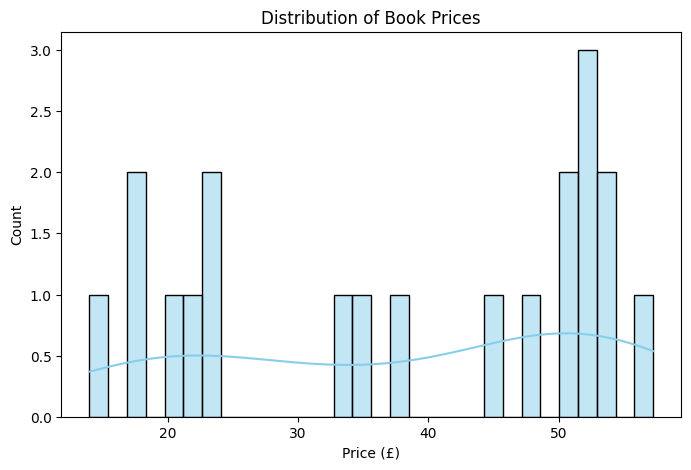

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Distribution of book prices
plt.figure(figsize=(8,5))
sns.histplot(data1['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

C:\Users\Joy\AppData\Local\Temp\ipykernel_13204\97994011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=data1, palette='viridis')


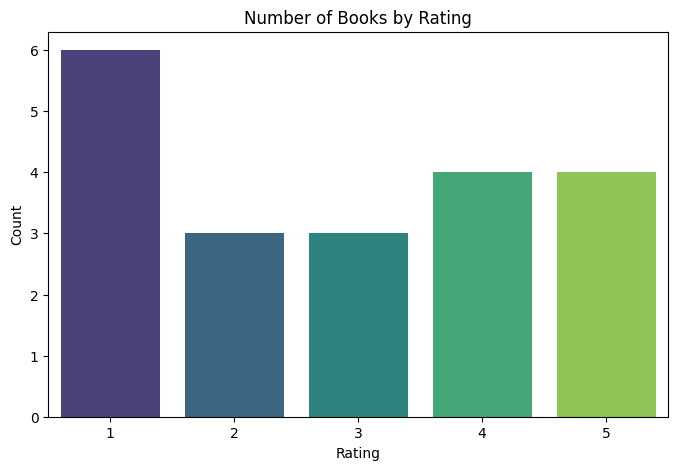

In [31]:
# Count of books by rating
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=data1, palette='viridis')
plt.title("Number of Books by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Most books are cheap or moderately priced (likely under £20).

Rating 3 is the most common, while 5-star books are rarer.

There may be a slight correlation between price and rating (higher-rated books might cost more).

In [52]:
print(data1[['Price', 'Rating']].corr())


           Price    Rating
Price   1.000000 -0.075857
Rating -0.075857  1.000000


In [53]:
data1.to_excel("books_babirye_cleaned.xlsx", index=False)
print("Cleaned dataset saved as books_babirye_cleaned.xlsx")


Cleaned dataset saved as books_babirye_cleaned.xlsx
